LOAD DATA

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving EmployeePromotion.csv to EmployeePromotion.csv


In [4]:
import io
train_data = pd.read_csv(io.BytesIO(uploaded['EmployeePromotion.csv']))

In [5]:
from google.colab import files
uploaded = files.upload()

Saving test_2umaH9m.csv to test_2umaH9m.csv


In [6]:
import io
test_data = pd.read_csv(io.BytesIO(uploaded['test_2umaH9m.csv']))

In [7]:
# Check training data only
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


DATA CLEANING

1.Handling Missing Values

In [9]:
# Get total missing values in 'education' column
train_data.education.isnull().sum()

2409

In [10]:
def fill_missing(df, column, value):
    df_copy = df.copy()
    df_copy[column].fillna(value=value,inplace=True)
    return df_copy

train_data = fill_missing(train_data, "education", "others")
test_data = fill_missing(test_data, "education", "others")

train_data = fill_missing(train_data, "previous_year_rating", 0.0)
test_data = fill_missing(test_data, "previous_year_rating", 0.0)

2.Convert 'object' columns into categorical

In [11]:
train_data.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [12]:
train_data.education.value_counts()

Bachelor's          36669
Master's & above    14925
others               2409
Below Secondary       805
Name: education, dtype: int64

In [13]:
train_data.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [14]:
train_data.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [15]:
# Convert 'object' columns into categorical datatype

def convert_to_category(df, column_list):
    df_copy = df.copy()
    df_copy[column_list] = df_copy[column_list].apply(lambda x: x.astype('category'))
    return df_copy

train_data = convert_to_category(train_data, ['department','region','education','gender','recruitment_channel'])
test_data = convert_to_category(test_data, ['department','region','education','gender','recruitment_channel'])

3.Check Duplicate Records

In [16]:
# Check if there is any duplicate employee ID
# Could also use df.duplicated().sum()

condition = bool(train_data.duplicated(subset = 'employee_id').any())

if condition:
    print('There are duplicate employee IDs')
else:
    print('No duplicate employee IDs')

No duplicate employee IDs


EXPLORATORY DATA ANALYSIS

In [17]:
# Check class balance

train_data.is_promoted.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [18]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


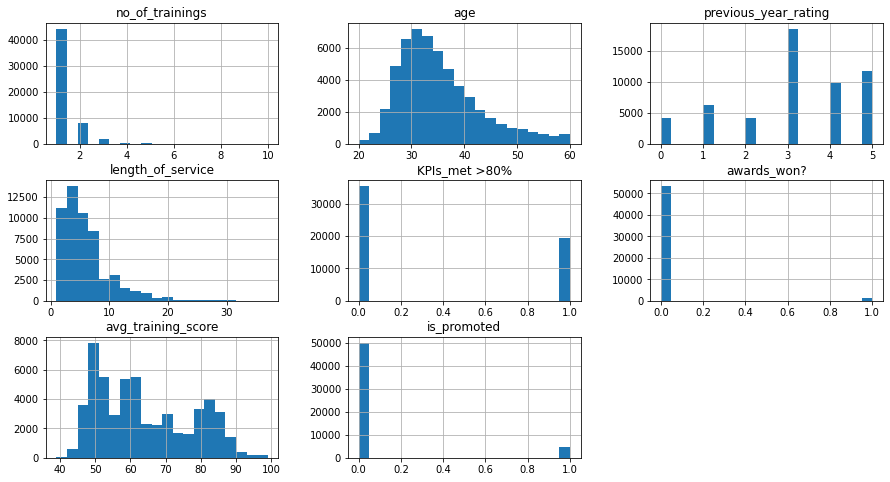

In [19]:
import matplotlib.pyplot as plt

# Remove column 'employee_id' from the dataframe
train_data.drop(columns='employee_id',inplace=True)  
test_data.drop(columns='employee_id',inplace=True)  

# Plot histograms of all numerical columns
train_data.hist(bins=20, figsize=(15,8))
plt.show()

In [20]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    promo_by_group = pd.crosstab(index=train_data['is_promoted'],columns = train_data[column_name], normalize = 'columns')
    promo_by_group = promo_by_group.apply(lambda x: round(x,2))
    
    labels = promo_by_group.columns
    list1 = promo_by_group.iloc[0].to_list()
    list2 = promo_by_group.iloc[1].to_list()
    
    list1_name = "Not promoted"
    list2_name = "Promoted"
    title = f"Promotion by {column_name}"
    xlabel = column_name
    ylabel = "Promotion percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

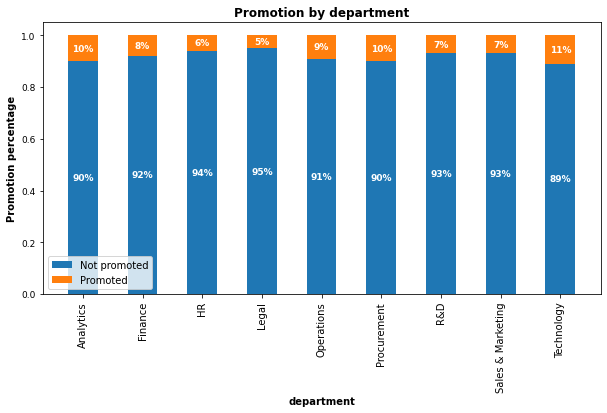

In [21]:
# Plot a stacked bar chart to visualize promotion data by department

create_stacked_bar('department')

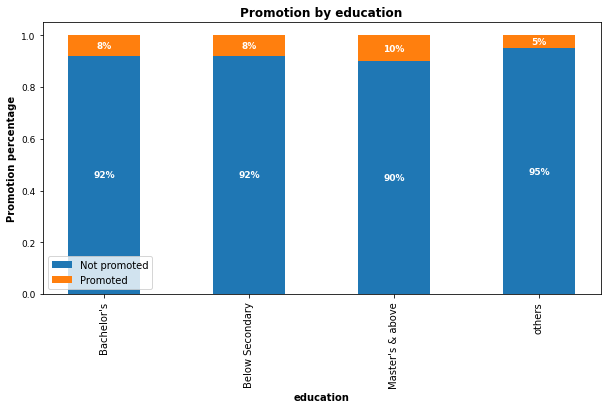

In [22]:
# Plot the percentage of promotion data by education

create_stacked_bar('education')

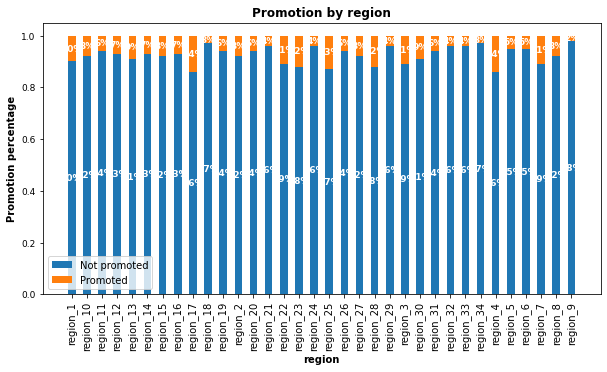

In [23]:
# Plot the percentage of promotion data by region

create_stacked_bar('region')

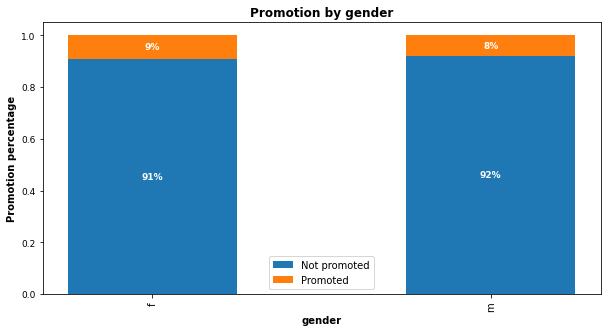

In [24]:
# Plot the percentage of promotion data by gender

create_stacked_bar('gender')

MODELING PREPARATION

1.Feature Engineering

In [25]:
# Bin ‘AGE’ data to groups
# Transform both training data and test data

def convert_age_to_group(df):
    df_copy = df.copy()
    bins = range(20,61,5)    # every 5 years as a bin
    labels = list(range(len(bins)-1))
    df_copy['age_group'] = pd.cut(df_copy['age'],bins=bins, labels=labels, right=True, include_lowest=True)
    df_copy.drop(columns=["age"], inplace=True)
    return df_copy

train_data = convert_age_to_group(train_data)
test_data = convert_age_to_group(test_data)

In [26]:
# Use LabelEncoder to convert categorical features into numerical array

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

def convert_to_numerical(df_train, df_test):
    df_train_copy = df_train.copy()
    df_test_copy = df_test.copy()
    
    for i in ["department", "region", "education", "gender", "recruitment_channel", "age_group"]:
        le = LabelEncoder()
        le.fit(df_train_copy.loc[:, i])
        df_train_copy.loc[:, i] = le.transform(df_train_copy.loc[:, i])
        df_test_copy.loc[:, i] = le.transform(df_test_copy.loc[:, i])
    
    return df_train_copy, df_test_copy

train_data, test_data = convert_to_numerical(train_data, test_data)

2.Feature Selection

In [27]:
# Define predictor variables and target variable
X = train_data.drop(columns=['is_promoted'])
y = train_data['is_promoted']

X_test = test_data.copy()

# Save all feature names as list
feature_cols = X.columns.tolist() 

# Extract numerical columns and save as a list for rescaling
num_cols = ['no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']

3.Split Training and Test Data

In [28]:
# Define function to split data with and without SMOTE 

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def data_split(X, y, imbalance = False):
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)
    
    if imbalance:
        # use SMOTE to over sample data
        sm = SMOTE(random_state = 42)
        X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
    
    return X_train, X_validation, y_train, y_validation

4.Rescale Features

In [29]:
# Define function to rescale training data using StandardScaler

from sklearn.preprocessing import StandardScaler

def standard_scaler(X_train, X_validation, X_test,  numerical_cols):
    
    # Make copies of dataset
    X_train_std = X_train.copy()
    X_validation_std = X_validation.copy()
    X_test_std = X_test.copy()
    
    # Apply standardization on numerical features only
    for i in numerical_cols:
        scl = StandardScaler().fit(X_train_std[[i]])     # fit on training data columns
        X_train_std[i] = scl.transform(X_train_std[[i]]) # transform the training data columns
        X_validation_std[i] = scl.transform(X_validation_std[[i]])   # transform the validation data columns
        X_test_std[i] = scl.transform(X_test_std[[i]])   # transform the test data columns

    return X_train_std, X_validation_std, X_test_std

PREDICTIVE MODELING

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import joblib

def run_models(X, y, X_test, num_cols, models):
    
    model_result = []

    for imbalance in [True, False]:
        X_train, X_validation, y_train, y_validation = data_split(X, y, imbalance = imbalance)
        X_train_std, X_validation_std, X_test_std = standard_scaler(X_train, X_validation, X_test, numerical_cols = num_cols)
       
        # Fit the model
        for model_name, model in models.items():
            model.fit(X_train_std, y_train)
            joblib.dump(model, f"{model_name}.pkl")   # save models as pickle file
            scores = cross_val_score(model, X_train_std, y_train, scoring ="roc_auc", cv = 5)
            roc_auc = np.mean(scores)

            model_result.append([model_name, imbalance,  roc_auc]) 
    df = pd.DataFrame(model_result, columns = ["Model", "SMOTE" , "ROC_AUC Score"])  
    df.to_csv("model_initial.csv", index=None)
    
    return df    

In [31]:
model_dict = {"Logistic Regression":LogisticRegression(random_state=42), 
              "Random Forest":RandomForestClassifier(random_state=42), 
              "XGBoost":  XGBClassifier(random_state=42)}

run_models(X, y, X_test, num_cols, model_dict)

,Model,SMOTE,ROC_AUC Score
0,Logistic Regression,True,0.792539
1,Random Forest,True,0.989097
2,XGBoost,True,0.945229
3,Logistic Regression,False,0.800802
4,Random Forest,False,0.880352
5,XGBoost,False,0.897614


HYPERPARAMETERS TUNING

Logistic Regression

In [32]:
# Randomized search for the best C parameter

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Split data with SMOTE 
X_train, X_validation, y_train, y_validation = data_split(X, y, imbalance = True)

# Rescale data
X_train_std, X_validation_std, X_test_std = standard_scaler(X_train, X_validation, X_test, numerical_cols = num_cols)

# Fit the model
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=42)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
lr_best = RandomizedSearchCV(logistic, distributions, random_state=42)

lr_best= lr_best.fit(X_train_std, y_train)   

print(lr_best.best_params_)

{'C': 2.832290311184182, 'penalty': 'l1'}


In [33]:
# Save tuned model and parameters

joblib.dump(lr_best,"logreg_tuned.pkl") 

['logreg_tuned.pkl']

In [34]:
# Get ROC_AUC score of tuned model on validation data

scores_tuned = cross_val_score(lr_best, X_validation_std, y_validation, scoring = "roc_auc", cv = 5)
roc_auc_lr_best = np.mean(scores_tuned)

# Save best ROC_AUC 
joblib.dump(roc_auc_lr_best,"logreg_ROC_AUC_tuned.pkl") 

print(f'ROC_AUC score after tuning parameters:{roc_auc_lr_best:.3f}')

ROC_AUC score after tuning parameters:0.802


RANDOM FOREST

In [35]:
from sklearn.model_selection import GridSearchCV

# Split data with SMOTE 
X_train, X_validation, y_train, y_validation = data_split(X, y, imbalance = True)

# Create parameter grid  
param_grid = {
    'max_depth': [60, 90, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the model
clf_rf = RandomForestClassifier(random_state=42)

# Instantiate grid search model
rf_best = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
                          cv = 3, n_jobs = -1, verbose = 1)

# Fit grid search to the data
rf_best.fit(X_train, y_train)
rf_best.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 60,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [36]:
# Save tuned model and parameters

joblib.dump(rf_best,"clf_rf_tuned.pkl") 

['clf_rf_tuned.pkl']

In [37]:
from sklearn.model_selection import GridSearchCV

# Split data with SMOTE 
X_train, X_validation, y_train, y_validation = data_split(X, y, imbalance = True)

# Create parameter grid  
param_grid = {
    'max_depth': [50,60,70],
    'min_samples_leaf': [2,3],
    'min_samples_split': [6,7,8],
    'n_estimators': [200,300,400]
}

# Instantiate the model
clf_rf = RandomForestClassifier(random_state=42)

# Instantiate grid search model
rf_best1 = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
                          cv = 3, n_jobs = -1, verbose = 1)

# Fit grid search to the data
rf_best1.fit(X_train, y_train)
rf_best1.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 400}

In [ ]:
# Get ROC_AUC score of tuned model on validation data

scores_tuned = cross_val_score(rf_best1, X_validation, y_validation, scoring = "roc_auc", cv = 5)
roc_auc_rf_best = np.mean(scores_tuned)

# Save best ROC_AUC 
joblib.dump(roc_auc_rf_best,"rf_ROC_AUC_tuned.pkl") 

print(f'ROC_AUC score after tuning parameters:{roc_auc_rf_best:.3f}')

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits


XGBoost

In [39]:
from pprint import pprint

# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }
pprint(random_grid_xgb)

{'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]),
 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]),
 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
 'max_depth': [3, 4, 5, 6, 7],
 'n_estimators': array([200, 400, 600, 800]),
 'scale_pos_weight': [1, 3.5],
 'subsample': array([0.5, 0.6, 0.7, 0.8])}


In [40]:
# Split data with SMOTE 
X_train, X_validation, y_train, y_validation = data_split(X, y, imbalance = True)
xgboost = XGBClassifier()

# Use randomized search
xgb_random = RandomizedSearchCV(estimator = xgboost, 
                                param_distributions = random_grid_xgb, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1,
                                scoring ='roc_auc')


xgb_random.fit(X_train, y_train)   
xgb_random.best_params_, xgb_random.best_score_

print(xgb_random.best_params_,xgb_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'subsample': 0.6, 'scale_pos_weight': 3.5, 'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7999999999999999} 0.9866596928201643


In [41]:
# Save tuned model and parameters

joblib.dump(xgb_random,"xgb_tuned.pkl") 

['xgb_tuned.pkl']

In [42]:
# Get ROC_AUC score of tuned model on validation data

scores_tuned = cross_val_score(xgb_random, X_validation, y_validation, scoring = "roc_auc", cv = 5)
roc_auc_xgb_best = np.mean(scores_tuned)

# Save best ROC_AUC 
joblib.dump(roc_auc_xgb_best,"xgb_ROC_AUC_tuned.pkl") 

print(f'ROC_AUC score after tuning parameters:{roc_auc_xgb_best:.3f}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
ROC_AUC score after tuning parameters:0.897


MODEL PERFORMANCE EVALUATION

In [43]:
# Define a function to compute Precision, Recall and F1 score

from sklearn.metrics import confusion_matrix

def get_pre_rec_f1(model_name, model,X_validation,y_validation):
    y_pred = model.predict(X_validation)
    tn, fp, fn, tp = confusion_matrix(y_validation, y_pred).ravel()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)
    
    return [model_name, precision, recall, F1]

In [44]:
# Logistic Regression model performance on validation data:
col_1 = get_pre_rec_f1("Logistic", lr_best, X_validation_std, y_validation)

# Random Forest model performance on validation data:
col_2 = get_pre_rec_f1("Random Forest",  rf_best1, X_validation, y_validation)

# XGBoost model performance on validation data:
col_3 = get_pre_rec_f1("XGBoost", xgb_random, X_validation, y_validation)

result = []
result.append(col_1)
result.append(col_2)
result.append(col_3)

pd.DataFrame(result, columns = ["Model", "Precision", "Recall", "F1"])

,Model,Precision,Recall,F1
0,Logistic,0.172388,0.656429,0.273065
1,Random Forest,0.393617,0.396429,0.395018
2,XGBoost,0.360482,0.534286,0.430504


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

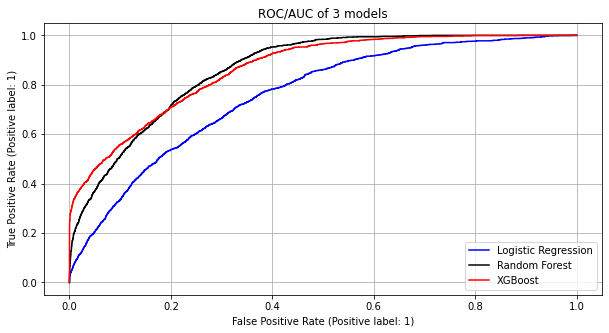

In [45]:
# Plot ROC_AUC curve of 3 models

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

fig,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(lr_best, X_validation_std, y_validation,ax=ax, color="blue",label='Logistic Regression')
plot_roc_curve(rf_best1, X_validation, y_validation,ax=ax, color="black",label='Random Forest')
plot_roc_curve(xgb_random, X_validation, y_validation,ax=ax, color="red",label='XGBoost')

plt.title('ROC/AUC of 3 models')
plt.grid()